## Polynomial Regression: Analytical Solution
Linear regression can be extended to model nonlinear relationships by introducing polynomial terms.


### Engineering Polynomial Features

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_data(n=50, noise=5.0):
    np.random.seed(42)
    X = np.linspace(-10, 10, n)
    # Ground truth line: y = 3x + 8
    true_slope = 3
    true_intercept = 8
    noise = np.random.randn(n) * noise
    y = true_slope * X + true_intercept + noise
    return X, y

X, y = generate_data(n=50, noise=5.0)




In [3]:
# Function to generate polynomial features (input matrix X')
def polynomial_features(X, degree):
    X_poly = np.c_[np.ones(len(X))]
    for i in range(1, degree + 1):
        X_poly = np.c_[X_poly, X**i]
    return X_poly


### Implement Polynomial Regression

In [4]:
def polynomial_regression(X,y,degree):
    X_poly = polynomial_features(X,degree)
    # Closed-form solution: w = (X'^T * X')^-1 * X'^T * y
    w = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)
    return w


m = 5  # Degree of the polynomial regression
w_poly = polynomial_regression(X, y, m)  # Parameter vector w

print(f"Parameters (w) for Degree {m}: {w_poly}")

Parameters (w) for Degree 5: [ 5.88112811e+00  3.55957762e+00  3.28108945e-02 -2.15493734e-02
 -6.78082560e-05  1.38175494e-04]


### Visualize the Polynomial Fit

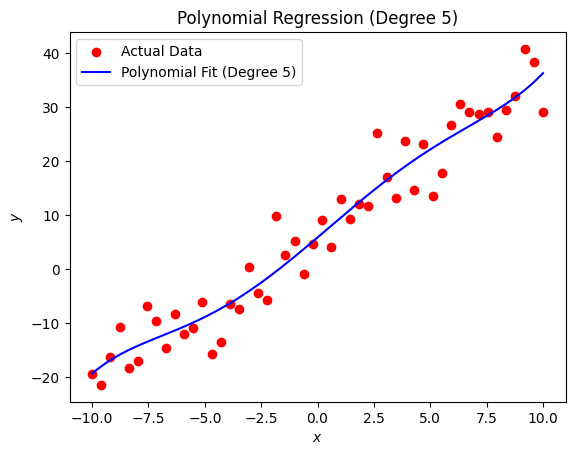

In [5]:
X_fit = np.linspace(X.min(), X.max(), 200)
X_fit_poly = polynomial_features(X_fit, m)
y_poly_pred = X_fit_poly.dot(w_poly)

# Plot the actual data and the polynomial fit
plt.scatter(X, y, color='red', label='Actual Data')
plt.plot(X_fit, y_poly_pred, color='blue', label=f'Polynomial Fit (Degree {m})')
plt.title(f"Polynomial Regression (Degree {m})")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

## Visualizing $E_{rms}$
The Root Mean Square Error (RMSE) helps us understand how well our model fits the data.

In [6]:
def compute_rms_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

### Visualizing RMSE for different Polynomial degrees
We could visualize the $ E_{rms} $ better if we split generated data into train and test datasets:

Degree 0: Train RMSE = 17.58, Test RMSE = 16.98


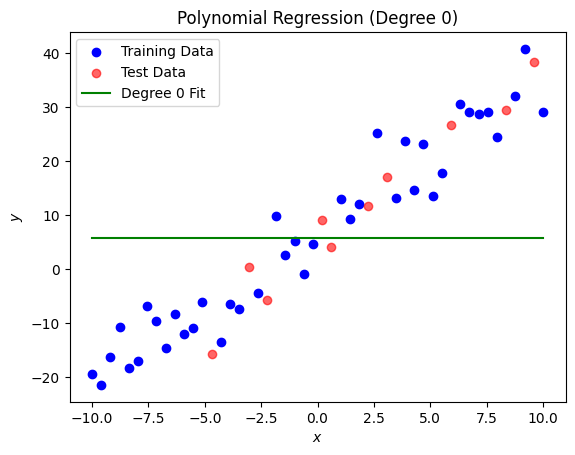

Degree 1: Train RMSE = 4.58, Test RMSE = 4.49


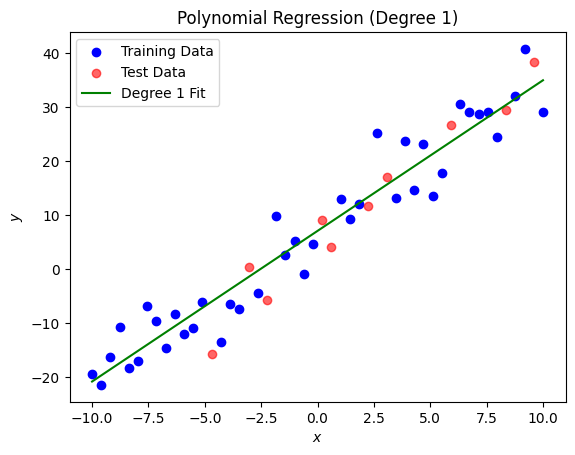

Degree 2: Train RMSE = 4.55, Test RMSE = 4.24


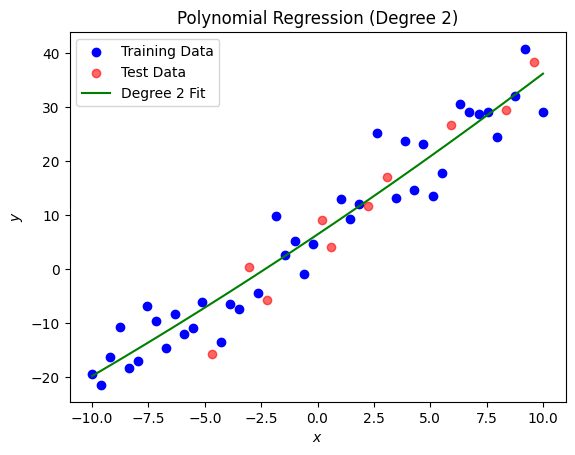

Degree 3: Train RMSE = 4.47, Test RMSE = 4.12


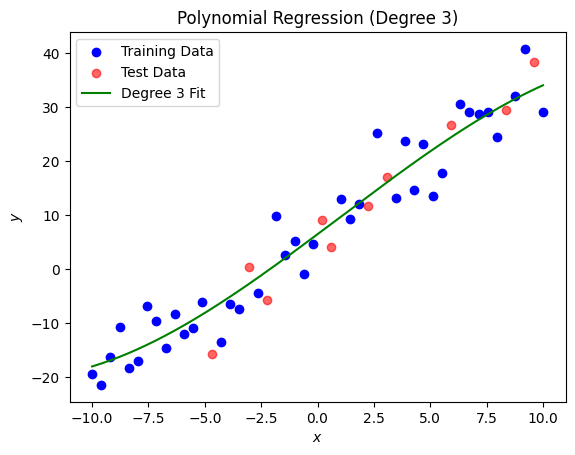

Degree 4: Train RMSE = 4.47, Test RMSE = 4.14


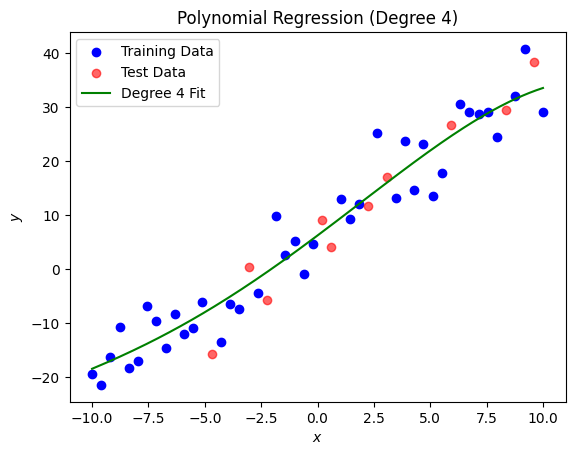

Degree 5: Train RMSE = 4.44, Test RMSE = 4.03


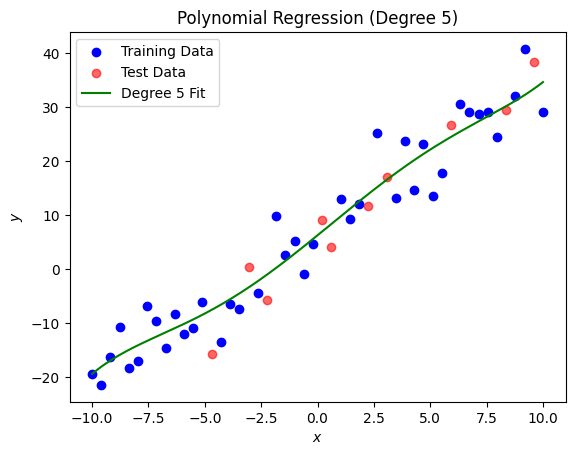

Degree 6: Train RMSE = 4.26, Test RMSE = 4.15


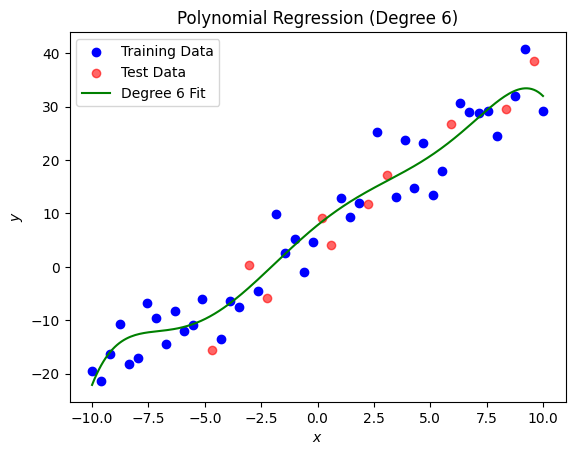

Degree 7: Train RMSE = 4.20, Test RMSE = 4.39


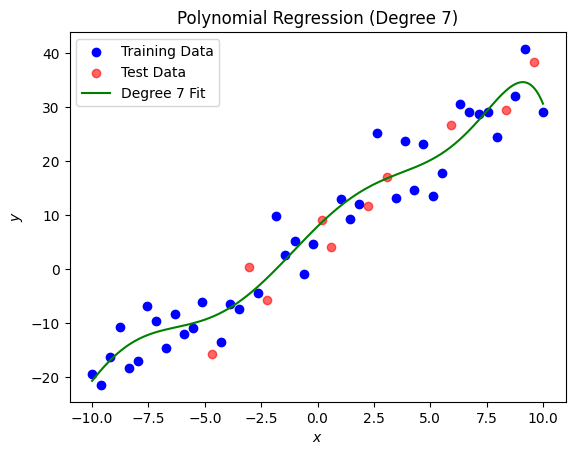

Degree 8: Train RMSE = 4.20, Test RMSE = 4.39


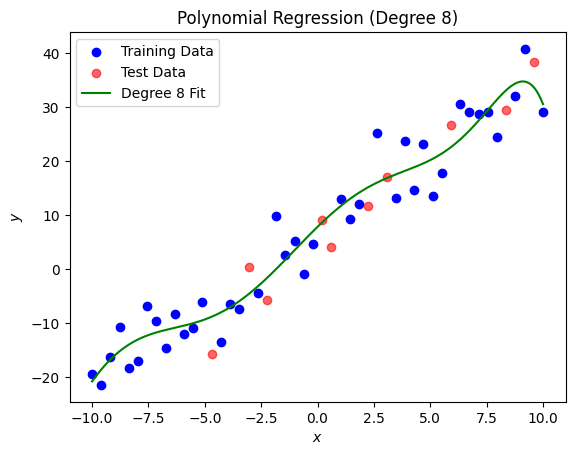

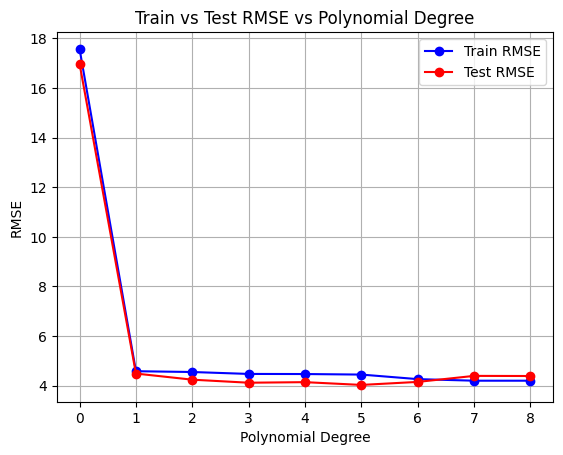

In [7]:
from sklearn.model_selection import train_test_split
# Split the data into 80% training and 20% testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = range(0,9)
train_rms_errors = []
test_rms_errors = []

for d in degrees:
    # Train the model on the training set
    w_poly = polynomial_regression(X_train,y_train,d)
    
    # Compute predictions for the training set
    X_train_poly = polynomial_features(X_train, d)
    y_train_pred = X_train_poly.dot(w_poly)
    
    # Compute predictions for the test set
    X_test_poly = polynomial_features(X_test, d)
    y_test_pred = X_test_poly.dot(w_poly)

    # Calculate RMSE for both training and test sets
    train_rms_error = compute_rms_error(y_train, y_train_pred)
    test_rms_error = compute_rms_error(y_test, y_test_pred)

    # Store the errors
    train_rms_errors.append(train_rms_error)
    test_rms_errors.append(test_rms_error)

    # Print the RMSE for the current degree
    print(f"Degree {d}: Train RMSE = {train_rms_error:.2f}, Test RMSE = {test_rms_error:.2f}")


    X_fit = np.linspace(X.min(), X.max(), 200)
    X_fit_poly = polynomial_features(X_fit, d)
    y_fit_pred = X_fit_poly.dot(w_poly)


    # Plot the polynomial fit on the training data
    plt.scatter(X_train, y_train, color='blue', label='Training Data')
    plt.scatter(X_test, y_test, color='red', label="Test Data", alpha=0.6)
    plt.plot(X_fit, y_fit_pred, color='green', label=f'Degree {d} Fit')
    plt.title(f"Polynomial Regression (Degree {d})")
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.legend()
    plt.show()


# Plot RMSE for training and test sets
plt.plot(degrees, train_rms_errors, marker='o', linestyle='-', color='blue', label='Train RMSE')
plt.plot(degrees, test_rms_errors, marker='o', linestyle='-', color='red', label='Test RMSE')
plt.title("Train vs Test RMSE vs Polynomial Degree")
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.xticks(degrees)
plt.grid(True)
plt.legend()
plt.show()

As you can see from the RMSE plot above, by increasing the degree polynomial, the training error never increases **(Why ?)**. However; testing error can increase.